In [9]:
import numpy as np
from astropy.io import fits
from datetime import datetime
import pandas as pd
from tqdm import tqdm
from celluloid import Camera
from scipy.io import readsav
import os
import glob
from tqdm import tqdm
import matplotlib
import matplotlib.style as style
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import AutoMinorLocator, MultipleLocator,FormatStrFormatter
plt.style.use("classic")

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font
# of your choice!)
# rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
# These parameters can also be put into the style or matplotlibrc.
# This is the dynamic approach of changing parameters.
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "font.size": 14,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "legend.frameon": True,
    "legend.framealpha": 0.8,
    "axes.formatter.use_mathtext": True,
    # "figure.dpi": 300,
    # "figure.autolayout": True,
    "lines.linewidth": 2,
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    "figure.facecolor": "white",
    # "savefig.bbox": "tight",
    # "savefig.dpi": 300,
    "pcolor.shading": "auto",
}
matplotlib.rcParams.update(tex_fonts)

# Set the font used for MathJax - more on this later
rc("mathtext", **{"default": "regular"})
plt.rcParams['savefig.facecolor']='white'

In [6]:
fname_ibis = sorted(glob.glob('11272018/6563*'))
ibis_chosen = readsav(fname_ibis[20])['nb_data_out']

In [7]:
spatial_x = ibis_chosen.shape[1]
tdmin = ibis_chosen.shape[0]
tdmin

27

100%|███████████████████████████████████████████| 27/27 [00:02<00:00, 11.39it/s]


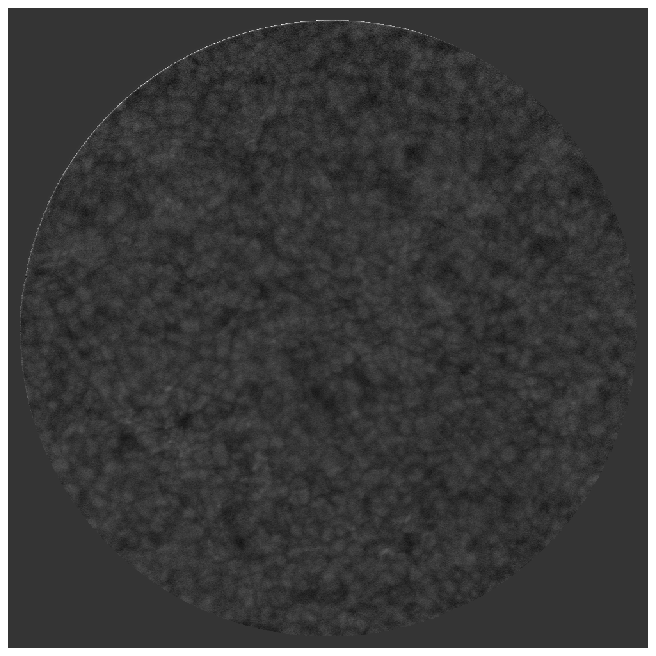

In [10]:
fig = plt.figure(figsize=[8, 8],frameon=False)
camera = Camera(fig)
for ext in tqdm(range(0,tdmin)):
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.pcolormesh(ibis_chosen[ext,:,:], cmap='gray')
    plt.axis('off')
    plt.margins(0,0)
    camera.snap()
animation = camera.animate()
animation.save('11.27.2018.IBIS.Halpha.scan20.gif', writer = 'imagemagick', fps=12)

In [11]:
print('Done')

Done
